In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [89]:
mpl.rcParams['figure.figsize'] = [20, 8]

In [109]:
linewidth = 0.8

In [91]:
from datetime import datetime
custom_time_parser = lambda x: datetime.strptime(x, "%H:%M:%S.%f").time()

In [92]:
df_full = pd.read_csv('../dataset/case28.csv', parse_dates=['Time'], date_parser=custom_time_parser)
df_full.index = df_full['Time']
df_full.drop(columns=['Time'], inplace=True)
df_full

d:\Users\dav\anaconda3\envs\pos\lib\site-packages\IPython\core\interactiveshell.py:3251: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,HR,SpO2,NBP (Sys),NBP (Dia),NBP (Mean),NBP (Pulse),NBP (Time Remaining),Pulse,BIS,etCO2,imCO2,ST-II,Temp,EEG,Alarms...
Time,,,,,,,,,,,,,,,
00:00:00,80.0,95.0,125,75.0,87.0,79,5.0,80.0,NaN,NaN,0,0.6,NaN,NaN,"AGM ALARM SUPPRESS,SPIRO ALARMS SUPPR"
00:00:00.010000,80.0,95.0,125,75.0,87.0,79,5.0,80.0,NaN,NaN,0,0.6,NaN,NaN,"AGM ALARM SUPPRESS,SPIRO ALARMS SUPPR"
00:00:00.020000,80.0,95.0,125,75.0,87.0,79,5.0,80.0,NaN,NaN,0,0.6,NaN,NaN,"AGM ALARM SUPPRESS,SPIRO ALARMS SUPPR"
00:00:00.030000,80.0,95.0,125,75.0,87.0,79,5.0,80.0,NaN,NaN,0,0.6,NaN,NaN,"AGM ALARM SUPPRESS,SPIRO ALARMS SUPPR"
00:00:00.040000,80.0,95.0,125,75.0,87.0,79,5.0,80.0,NaN,NaN,0,0.6,NaN,NaN,"AGM ALARM SUPPRESS,SPIRO ALARMS SUPPR"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
01:14:21.060000,NaN,NaN,74,45.0,52.0,67,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,"*** APNEA ,** NBPs LOW ,** PIP ..."
01:14:21.070000,NaN,NaN,74,45.0,52.0,67,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,"*** APNEA ,** NBPs LOW ,** PIP ..."
01:14:21.080000,NaN,NaN,74,45.0,52.0,67,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,"*** APNEA ,** NBPs LOW ,** PIP ..."


In [93]:
df_train_sub_sampled = pd.read_csv('../dataset/case_28_series_train.csv', parse_dates=['Time'], date_parser=custom_time_parser)
df_test_sub_sampled = pd.read_csv('../dataset/case_28_series_test.csv', parse_dates=['Time'], date_parser=custom_time_parser)
df_train_sub_sampled

,Time,EEG,BIS
0,00:00:00,NaN,NaN
1,00:00:01,NaN,NaN
2,00:00:02,NaN,NaN
3,00:00:03,NaN,NaN
4,00:00:04,NaN,NaN
...,...,...,...
3341,00:55:41,-3.00671,83.0
3342,00:55:42,0.01526,83.0
3343,00:55:43,-1.99939,80.0
3344,00:55:44,3.00671,80.0


In [94]:
df_train_sub_sampled.index = df_train_sub_sampled['Time']
df_train_sub_sampled.drop(columns=['Time'], inplace=True)
df_test_sub_sampled.index = df_test_sub_sampled['Time']
df_test_sub_sampled.drop(columns=['Time'], inplace=True)
df_train_sub_sampled

,EEG,BIS
Time,,
00:00:00,NaN,NaN
00:00:01,NaN,NaN
00:00:02,NaN,NaN
00:00:03,NaN,NaN
00:00:04,NaN,NaN
...,...,...
00:55:41,-3.00671,83.0
00:55:42,0.01526,83.0
00:55:43,-1.99939,80.0


## Complete dataset

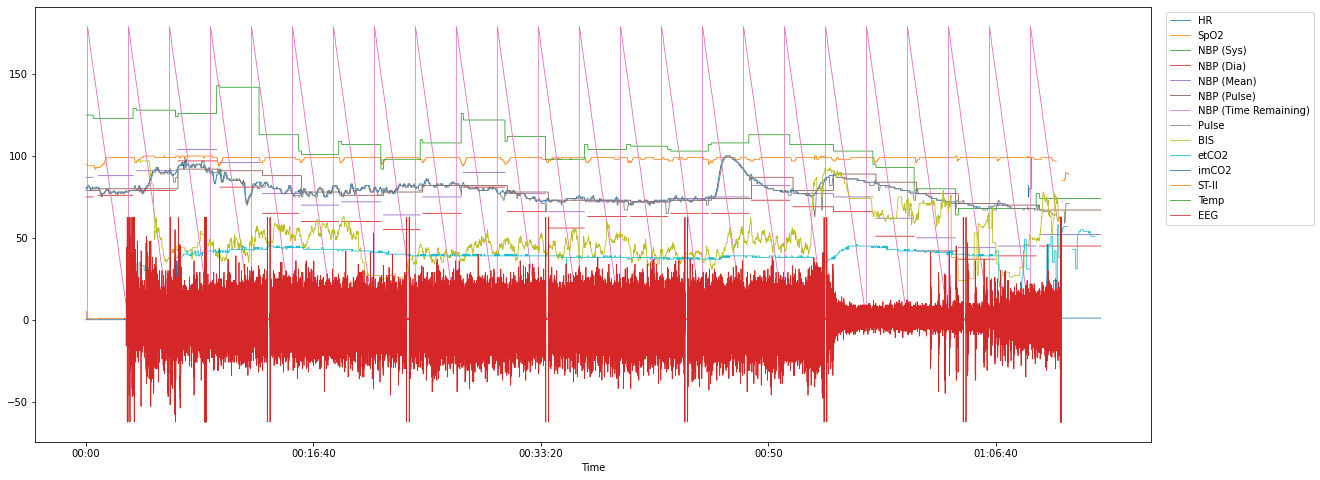

In [110]:
df_full.plot(linewidth = linewidth)
plt.legend(bbox_to_anchor=(1.15,1), loc="upper right")

## Main signals to be analized (full dataset and full sampled - 10 milliseconds frequency)

In [96]:
len(df_full)

446111

<AxesSubplot:xlabel='Time'>

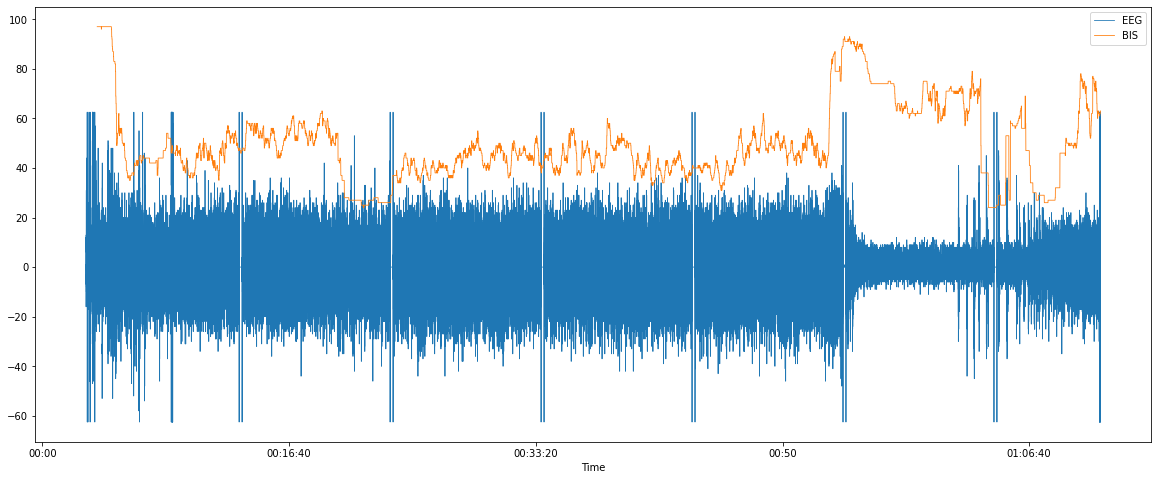

In [119]:
df_full[['EEG', 'BIS']].plot(linewidth = linewidth)

## Subsampling the dataset to 100 milliseconds frequency)

<AxesSubplot:xlabel='Time'>

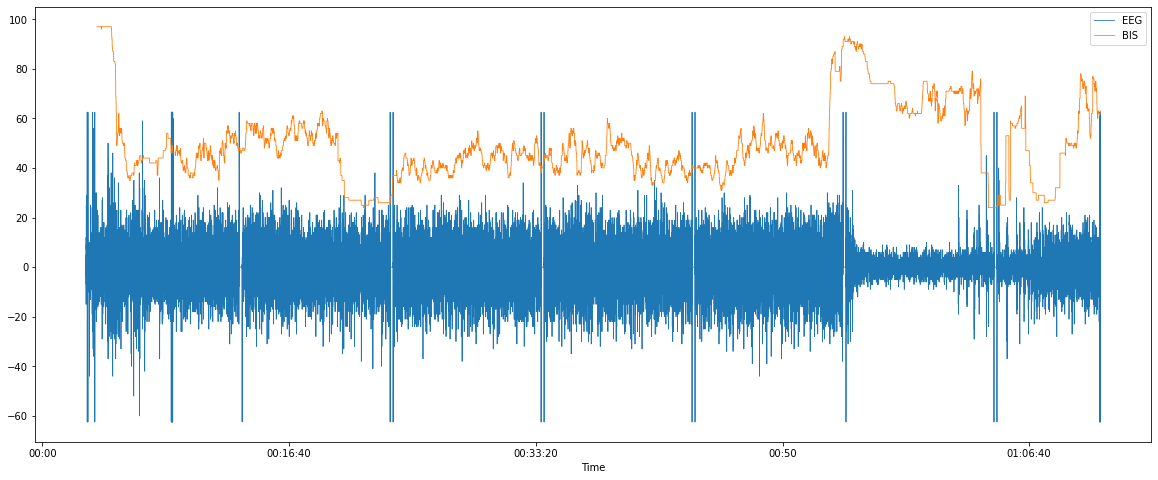

In [112]:
df_full[['EEG', 'BIS']].iloc[::10].plot(linewidth = linewidth)

## Subsampling the dataset to 200 milliseconds frequency)

<AxesSubplot:xlabel='Time'>

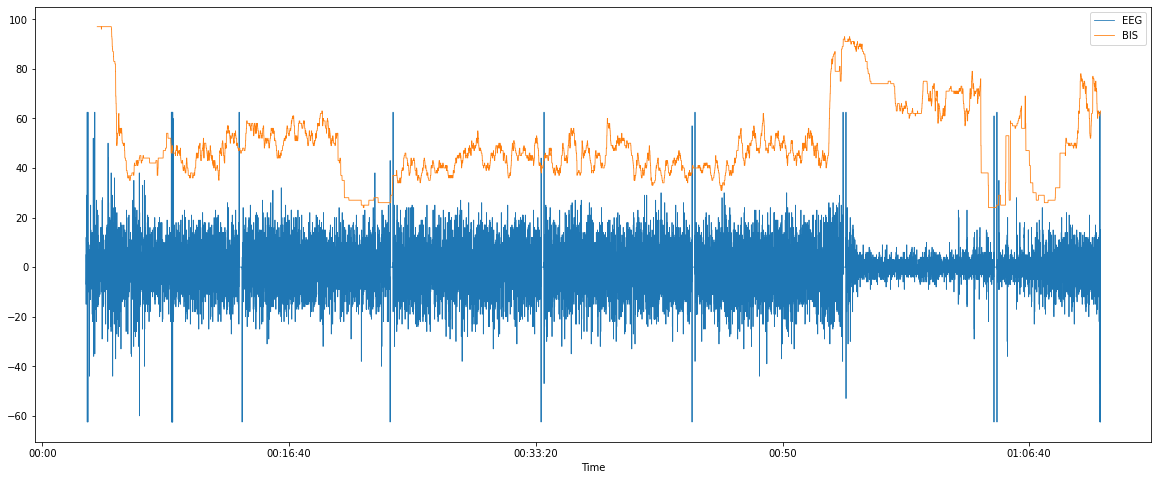

In [113]:
df_full[['EEG', 'BIS']].iloc[::20].plot(linewidth = linewidth)

## Subsampling the dataset to 300 milliseconds frequency)

<AxesSubplot:xlabel='Time'>

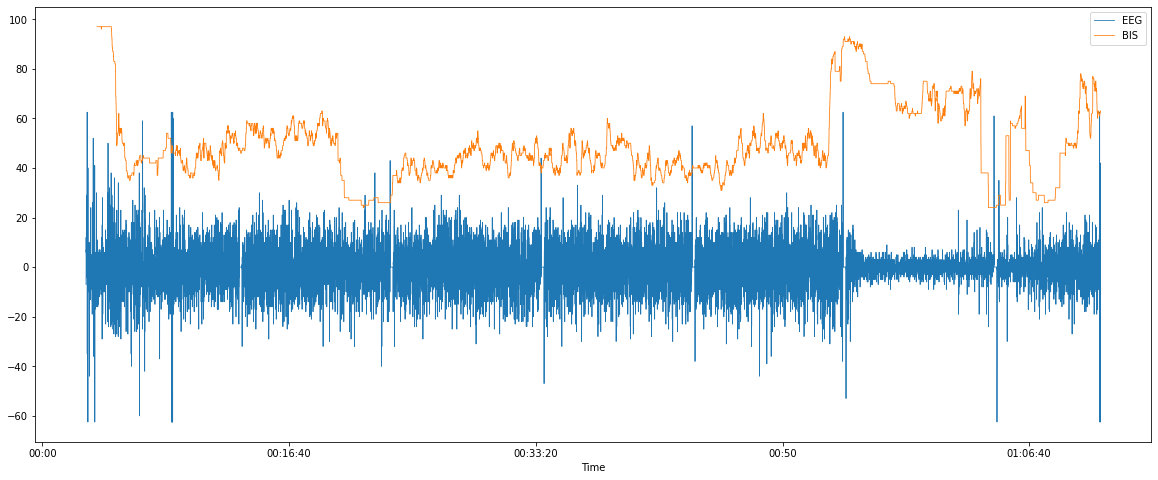

In [114]:
df_full[['EEG', 'BIS']].iloc[::30].plot(linewidth = linewidth)

## Subsampling the dataset to 400 milliseconds frequency)

<AxesSubplot:xlabel='Time'>

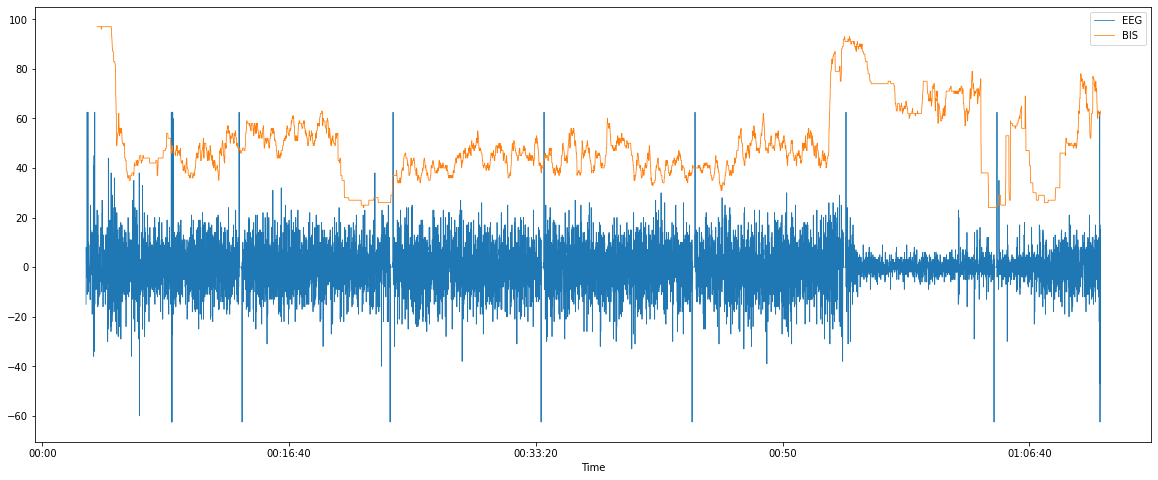

In [115]:
df_full[['EEG', 'BIS']].iloc[::40].plot(linewidth = linewidth)

## Subsampling the dataset to 500 milliseconds frequency)

<AxesSubplot:xlabel='Time'>

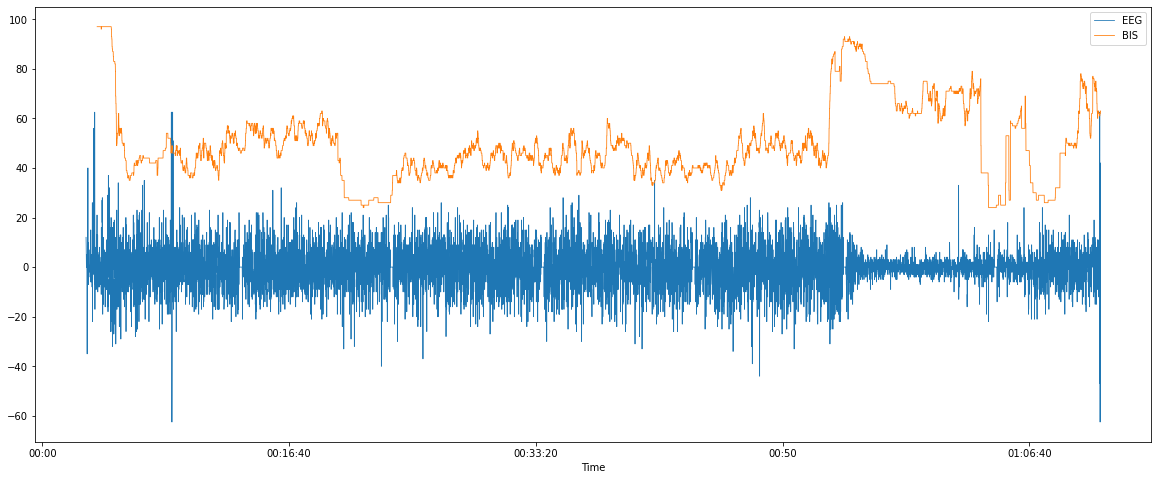

In [116]:
df_full[['EEG', 'BIS']].iloc[::50].plot(linewidth = linewidth)

## Considering that on this frequency one seasonality component of the EEG signal has been lost, we decided to subsample the dataset to the frequency of 200 milliseconds.


<AxesSubplot:xlabel='Time'>

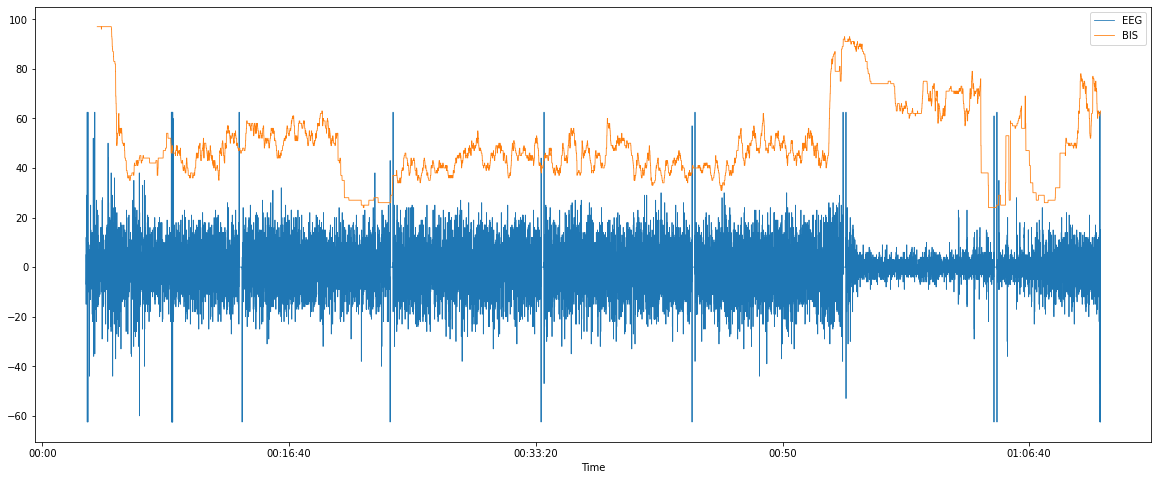

In [117]:
df_subsampled = df_full[['EEG', 'BIS']].iloc[::20]
df_subsampled.plot(linewidth = linewidth)

## Splitting train (75%) and test (25%) for ARIMA, and for validation, the remaining 25% will be splitted later 

In [104]:
df_subsampled_train = df_subsampled.iloc[:int(len(df_subsampled) * 0.75)]
df_subsampled_test = df_subsampled.iloc[int(len(df_subsampled) * 0.75):]

<AxesSubplot:xlabel='Time'>

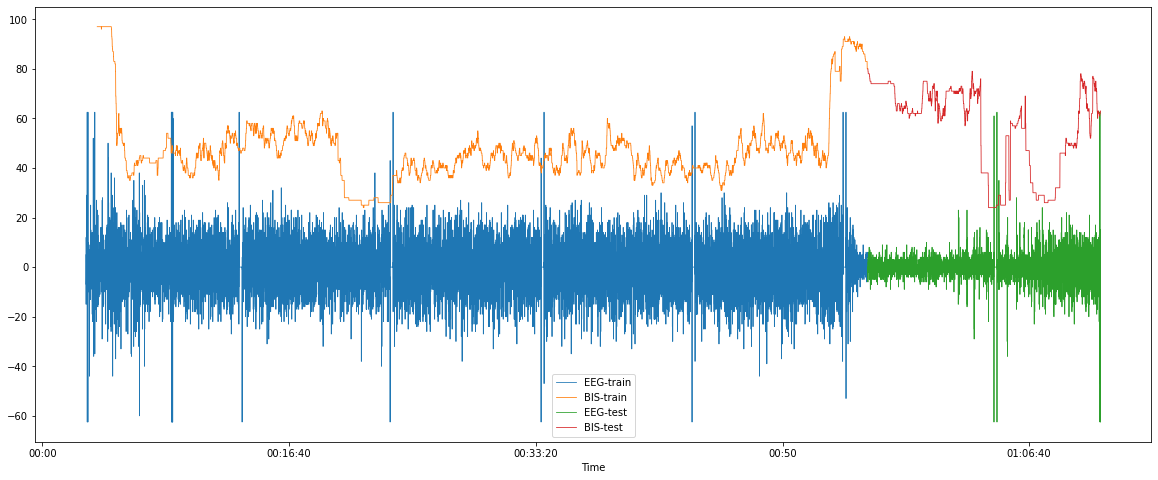

In [118]:
ax = df_subsampled_train.rename(columns={'EEG': 'EEG-train', 'BIS': 'BIS-train'}).plot(linewidth = linewidth)
df_subsampled_test.rename(columns={'EEG': 'EEG-test', 'BIS': 'BIS-test'}).plot(ax=ax, linewidth = linewidth)

In [106]:

df_subsampled_train.to_csv('../dataset/case_28_subsampled_200ms_train.csv')
df_subsampled_test.to_csv('../dataset/case_28_subsampled_200ms_test.csv')
df_subsampled_train

,EEG,BIS
Time,,
00:00:00,NaN,NaN
00:00:00.200000,NaN,NaN
00:00:00.400000,NaN,NaN
00:00:00.600000,NaN,NaN
00:00:00.800000,NaN,NaN
...,...,...
00:55:44.800000,0.01526,80.0
00:55:45,0.01526,80.0
00:55:45.200000,0.01526,80.0


In [107]:
df_subsampled_test

,EEG,BIS
Time,,
00:55:45.800000,0.01526,80.0
00:55:46,-3.00671,80.0
00:55:46.200000,-5.99817,79.0
00:55:46.400000,-1.99939,79.0
00:55:46.600000,-1.99939,79.0
...,...,...
01:14:20.200000,NaN,NaN
01:14:20.400000,NaN,NaN
01:14:20.600000,NaN,NaN
